# Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [17]:
#Loading Dataset
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
#column names of the dataset
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
bos.columns = boston.feature_names

In [20]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
#Dataset Description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [22]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [23]:
#Data shape
bos.shape

(506, 13)

In [25]:
#info
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


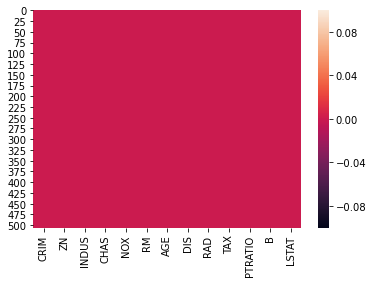

In [26]:
#Checking for null values if any
sns.heatmap(bos.isnull())

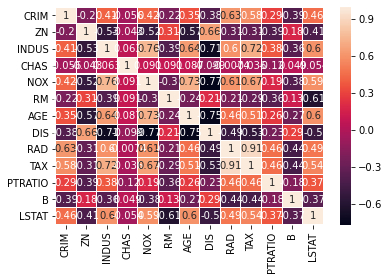

In [27]:
data= bos.corr()
sns.heatmap(data=data,annot=True,linewidths=0.1)

In [28]:
bos['Price']=boston.target

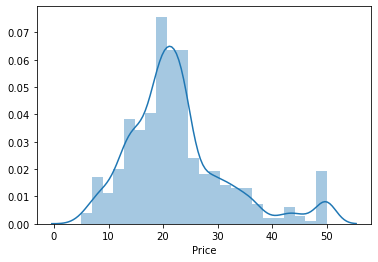

In [29]:
sns.distplot(bos['Price'])

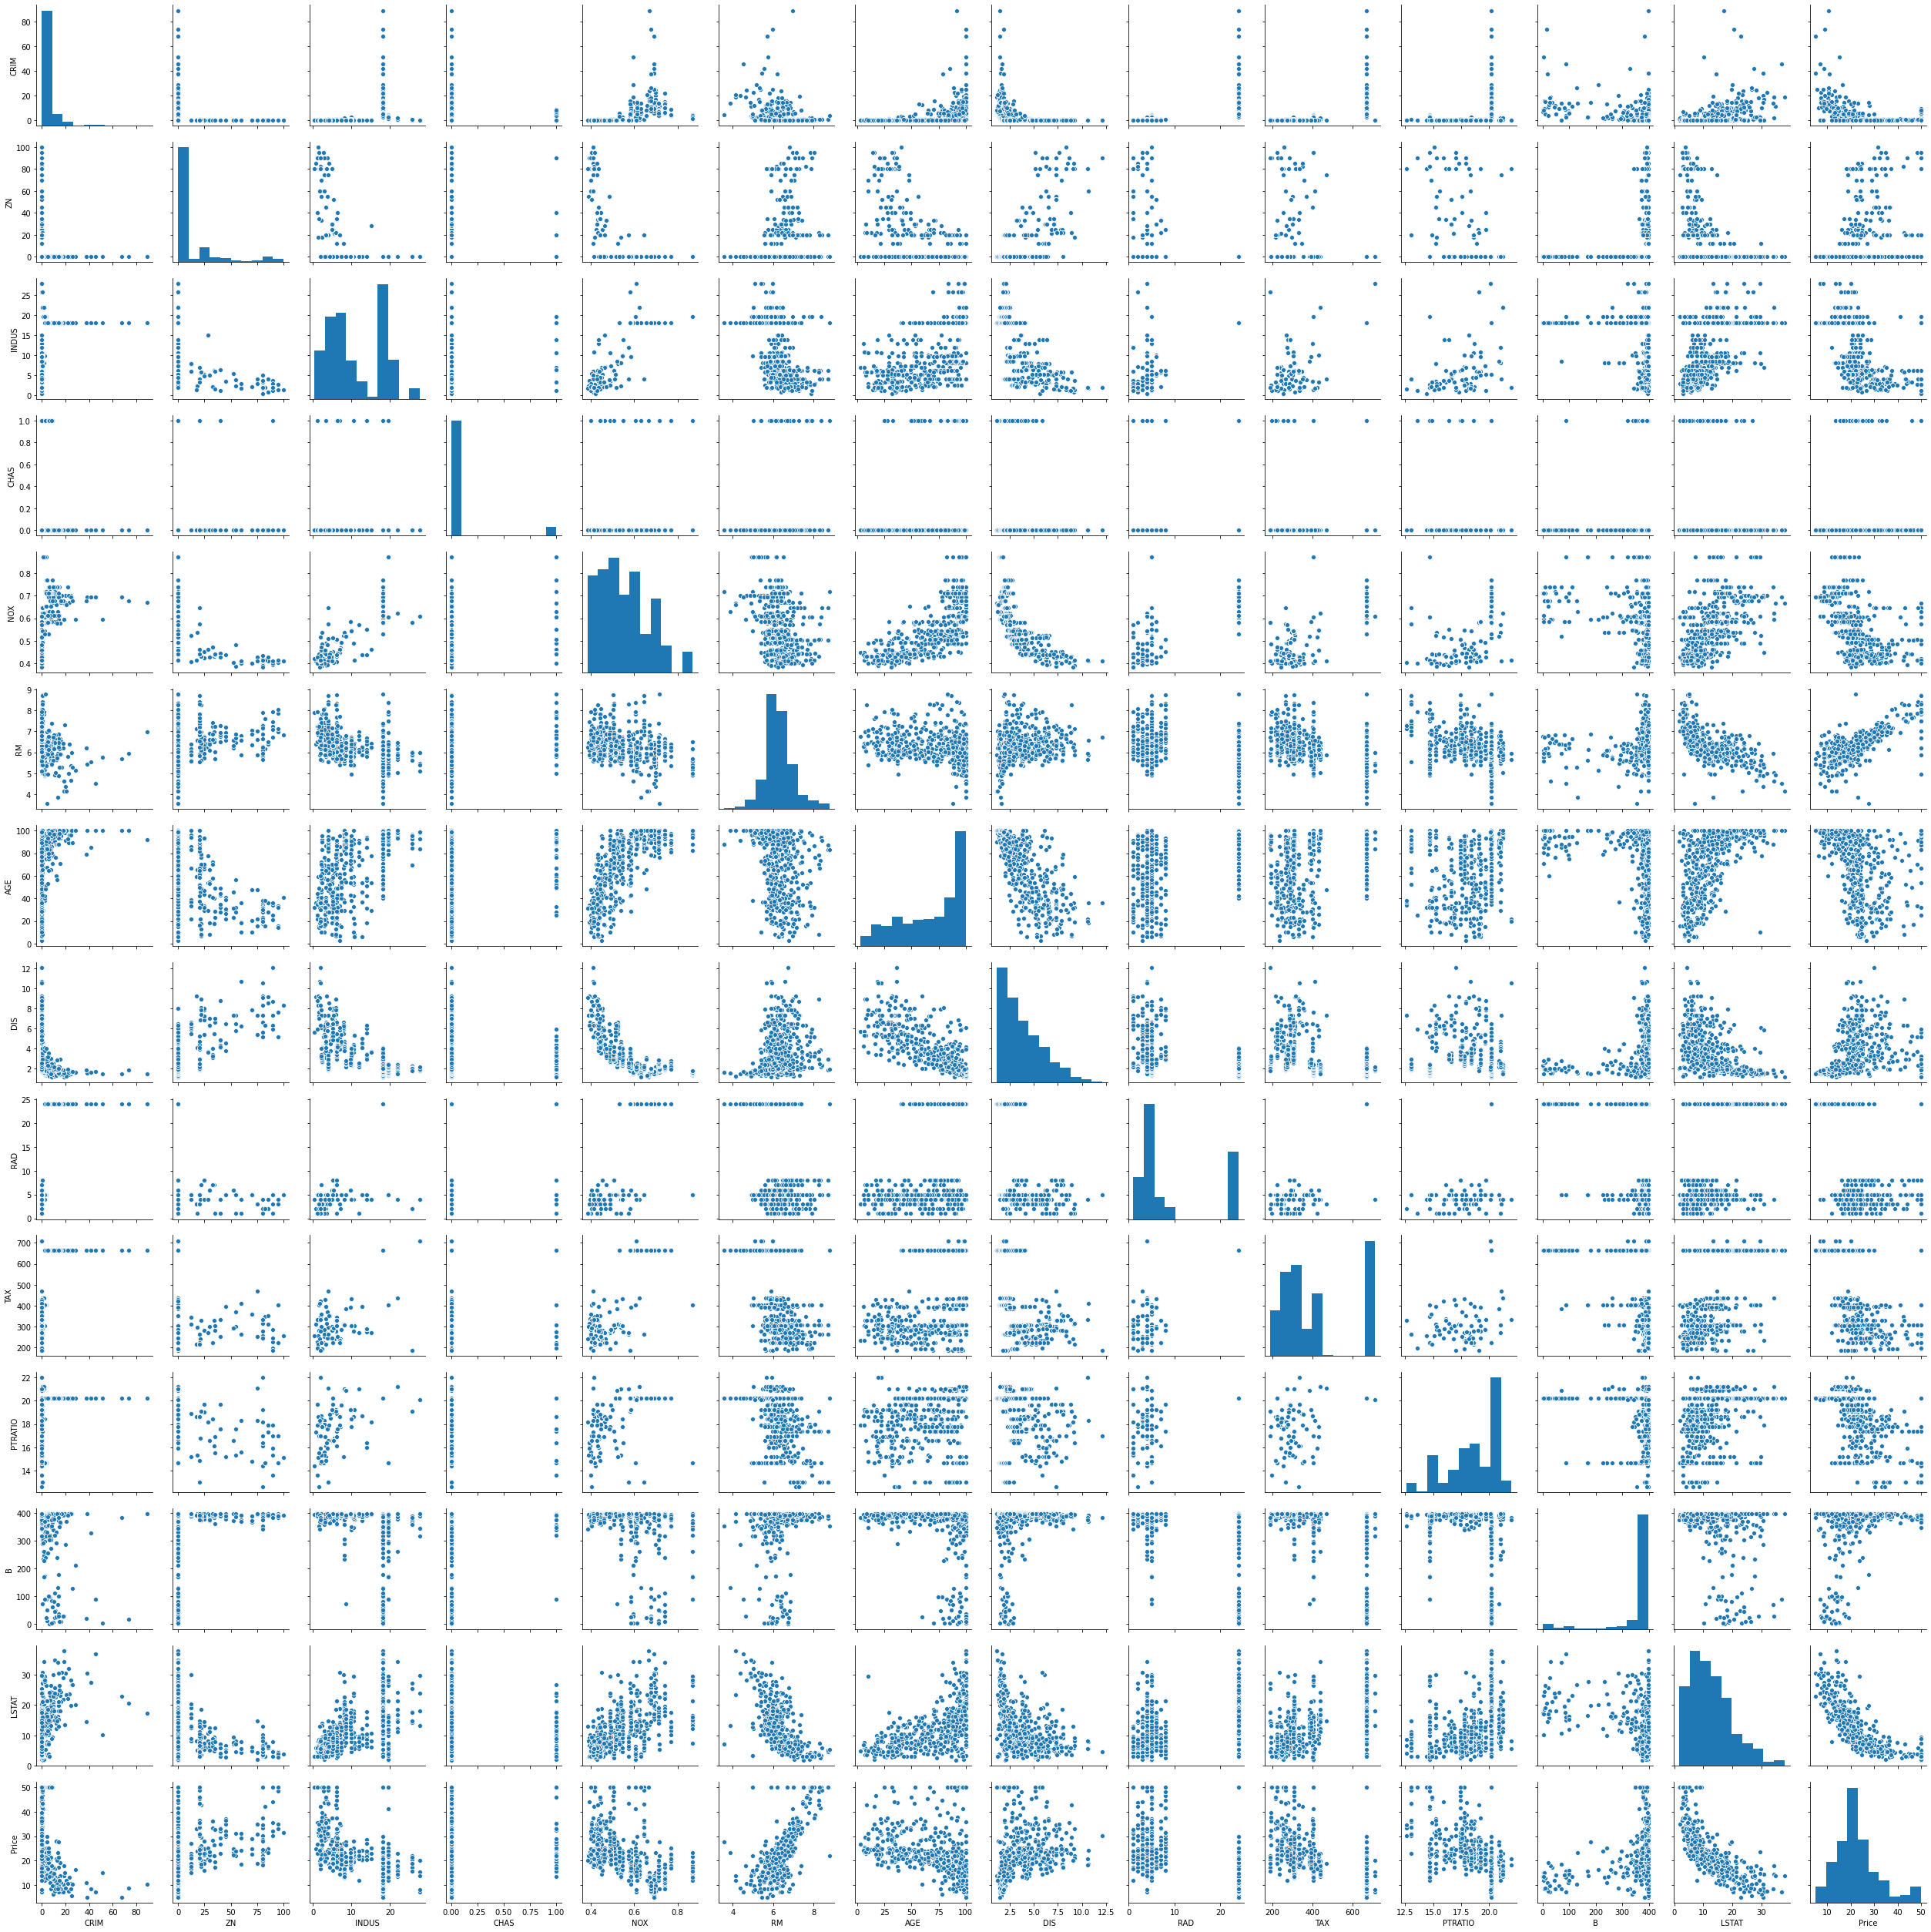

In [30]:
sns.pairplot(bos)

Train_Test_Split

In [31]:
# Creating Predictor variable 'X' and Target Variable 'y'
X = bos.drop('Price',axis=1)
Y = bos['Price']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

In [33]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [36]:
# print the intercept
print(lin_reg.intercept_)

33.1158409429861


In [37]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.076918
ZN,0.039553
INDUS,-0.006099
CHAS,2.630350
NOX,-13.141618
RM,3.844180
AGE,-0.012062
DIS,-1.376263
RAD,0.283925
TAX,-0.014064


Interpreting the coefficients: Holding all other features fixed, a 1 unit increase in RM(average number of rooms per dwelling) is associated with an increase of $5.032224 . This can be extended for any feature and coefficient.

In [38]:
#Prediction
pred = lin_reg.predict(X_test)
print(pred)

[34.01651319 31.05189517 22.33884524 18.0838353  20.56688064 25.98808555
 26.01540609 23.82611577 22.21599346 19.28360875 26.66123555 16.98260577
 20.99150244 15.24603617 41.09899335 20.25245593 28.49362648 19.02746332
 32.1219971  40.55013347 34.85510783 16.62558247 20.26594393 17.78965573
 13.61712506 12.31506816 27.30863471 20.08837791 18.3960775  20.36652738
 15.63267698 24.40174268 38.95380335 24.82674    31.67752332 28.52641185
 14.69895345 14.24630553 16.49088419 23.30593651 23.14883147 23.67414203
 13.62859392 21.35912779 31.4375316  26.93449598 19.05250575 16.18779463
 16.95967267 12.540738   21.69054323 20.12269149 23.8317502  24.2081579
 11.78551306 14.84388066 25.02378959 33.63041801 10.04068529 21.02680054
 17.26643982 19.29350402 18.0135788  30.0595925  21.27173516 25.42909898
 15.88028621 25.28296871 22.47917188 20.74200168 18.69920794 24.16662272
  4.47298602 16.46083658 28.38288604  9.32903069 25.14514574 35.03923207
 11.97230524 26.9903998  34.80131719 40.61070638 14.

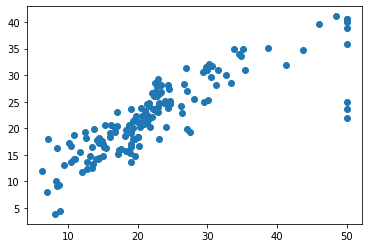

In [39]:
#Plotting Predictions
plt.scatter(Y_test,pred)

In [40]:
df1=pd.DataFrame({'Actual':Y_test, 'predicted':pred})
df2=df1.head(10)
df2

,Actual,predicted
198,34.6,34.016513
229,31.5,31.051895
502,20.6,22.338845
31,14.5,18.083835
315,16.2,20.566881
169,22.3,25.988086
111,22.8,26.015406
206,24.4,23.826116
108,19.8,22.215993
420,16.7,19.283609


In [43]:
from sklearn import metrics

In [44]:
print(f'MAE:{metrics.mean_absolute_error(Y_test, pred)}')
print(f'MSE:{metrics.mean_squared_error(Y_test, pred)}')
print(f'RMSE:{np.sqrt(metrics.mean_squared_error(Y_test, pred))}')

MAE:3.4719478482701693
MSE:29.79884430147885
RMSE:5.45883177076184
